In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb
import surprise
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import model_selection
from surprise import prediction_algorithms
from collections import defaultdict
import pickle

In [45]:
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
sim_options = {'name': 'pearson',
               'user_based': True }
ratings_df = pd.read_csv('ratings.csv')

In [46]:
t_list = [i for i in range(1,26)]

In [47]:
splits = 10

In [51]:
def plot_ranking(t_list, precisions, recalls, title):
    plt.plot(t_list, precisions, color="blue")
    plt.xlabel("t")
    plt.ylabel("Precision")
    plt.title(title + " " + "Precision vs t")
    plt.show()
    
    plt.plot(t_list, recalls, color="green")
    plt.xlabel("t")
    plt.ylabel("Recall")
    plt.title(title + " " + "Recall vs t")
    plt.show()
    
    plt.plot(recalls, precisions, color="red")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title + " " + "Precision vs Recall")
    plt.show()

In [59]:
def plot_ranking_all(t_list, precisions_list, recalls_list):
    plt.plot(t_list, precisions_list[0], color="blue", label = "KNN")
    plt.plot(t_list, precisions_list[1], color="green", label = "NNMF")
    plt.plot(t_list, precisions_list[2], color="red", label = "MF")
    plt.xlabel("t")
    plt.ylabel("Precision")
    plt.title("Precision vs t")
    plt.legend(loc="best")
    plt.show()
    
    plt.plot(t_list, recalls_list[0], color="blue", label = "KNN")
    plt.plot(t_list, recalls_list[1], color="green", label = "NNMF")
    plt.plot(t_list, recalls_list[2], color="red", label = "MF")
    plt.xlabel("t")
    plt.ylabel("Recall")
    plt.title("Recall vs t")
    plt.legend(loc="best")
    plt.show()
    
    plt.plot(recalls_list[0], precisions_list[0], color="blue", label = "KNN")
    plt.plot(recalls_list[1], precisions_list[1], color="green", label = "NNMF")
    plt.plot(recalls_list[2], precisions_list[2], color="red", label = "MF")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall")
    plt.legend(loc="best")
    plt.show()

In [7]:
#Question 36: KNN

In [8]:
k_best = 24

In [12]:
precisions = []
recalls = []

for n in t_list:
    kf = KFold(n_splits=splits)
    precision = 0.0
    recall = 0.0
    
    print ("n=",n)
    for trainset, testset in kf.split(data):
        algo = prediction_algorithms.knns.KNNWithMeans(k=k_best, sim_options=sim_options)
        algo.fit(trainset)
        predictions = algo.test(testset)
        
        user_ratings = defaultdict(list)
        user_predicted = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            user_ratings[uid].append((iid, true_r))
            user_predicted[uid].append((iid, est))
            
            
        user_ratings_filtered = defaultdict(list)
        user_predicted_filtered = defaultdict(list)
        for uid, ratings_list in user_predicted.items():
            ratings_list.sort(key=lambda x: x[1], reverse=True)
            movie_ids_sorted = list(map(lambda x:x[0], ratings_list))
            user_predicted_filtered[uid] = movie_ids_sorted[:n]
            
        user_list = []
        for uid, ratings_list in user_ratings.items():
            u = filter(lambda x:x[1]>=3,ratings_list)
            liked_movies = list(map(lambda x:x[0],u))
            if (len(liked_movies) >= n):
                user_ratings_filtered[uid] = liked_movies
                user_list.append(uid)
                
        precision_fold = 0.0
        recall_fold = 0.0
        for uid in user_list:
            g_len = float(len(user_ratings_filtered[uid]))
            s_len = float(len(user_predicted_filtered[uid]))
            c_len = float(len(set(user_ratings_filtered[uid])&set(user_predicted_filtered[uid])))
            
            precision_fold += c_len/s_len
            recall_fold += c_len/g_len
            
        precision_fold /= float(len(user_list))
        recall_fold /= float(len(user_list))
        
        precision += precision_fold
        recall += recall_fold
            
    precisions.append(precision/float(splits))
    recalls.append(recall/float(splits))
    
knn_precisions = precisions
knn_recalls = recalls

n= 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
n= 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similari

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
n= 12
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
n= 23
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity mat

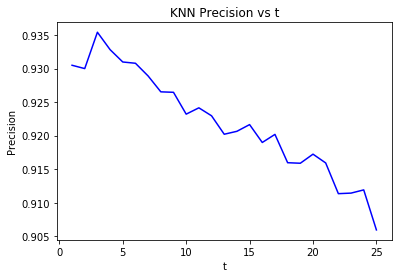

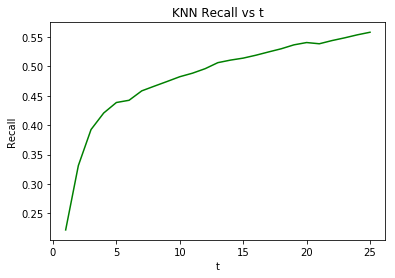

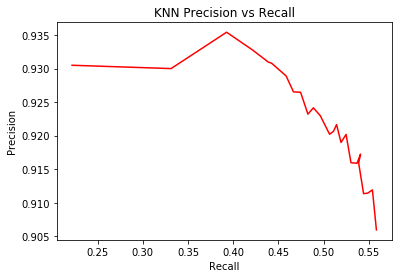

In [52]:
plot_ranking(t_list, knn_precisions, knn_recalls, "KNN")

In [14]:
with open('knn_precisions', 'wb') as f:
    pickle.dump(knn_precisions, f)
with open('knn_recalls', 'wb') as f:
    pickle.dump(knn_recalls, f)

In [37]:
with open('knn_precisions', 'rb') as f:
    knn_precisions = pickle.load(f)
with open('knn_recalls', 'rb') as f:
    knn_recalls = pickle.load(f)

In [15]:
#Question 37: NNMF

In [16]:
min_k_q18= 18

In [17]:
precisions = []
recalls = []

for n in t_list:
    kf = KFold(n_splits=splits)
    precision = 0.0
    recall = 0.0
    users = 0.0
    print ("n=",n)
    for trainset, testset in kf.split(data):
        algo = prediction_algorithms.matrix_factorization.NMF(n_factors=min_k_q18, biased =False)
        algo.fit(trainset)
        predictions = algo.test(testset)
        
        user_ratings = defaultdict(list)
        user_predicted = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            user_ratings[uid].append((iid, true_r))
            user_predicted[uid].append((iid, est))
            
            
        user_ratings_filtered = defaultdict(list)
        user_predicted_filtered = defaultdict(list)
        for uid, ratings_list in user_predicted.items():
            ratings_list.sort(key=lambda x: x[1], reverse=True)
            movie_ids_sorted = list(map(lambda x:x[0], ratings_list))
            user_predicted_filtered[uid] = movie_ids_sorted[:n]
            
        user_list = []
        for uid, ratings_list in user_ratings.items():
            u = filter(lambda x:x[1]>=3,ratings_list)
            liked_movies = list(map(lambda x:x[0],u))
            if (len(liked_movies) >= n):
                user_ratings_filtered[uid] = liked_movies
                user_list.append(uid)
                
        precision_fold = 0.0
        recall_fold = 0.0
        for uid in user_list:
            g_len = float(len(user_ratings_filtered[uid]))
            s_len = float(len(user_predicted_filtered[uid]))
            c_len = float(len(set(user_ratings_filtered[uid])&set(user_predicted_filtered[uid])))
            
            precision_fold += c_len/s_len
            recall_fold += c_len/g_len
            
        precision_fold /= float(len(user_list))
        recall_fold /= float(len(user_list))
        
        precision += precision_fold
        recall += recall_fold
            
    precisions.append(precision/float(splits))
    recalls.append(recall/float(splits))
    
nmf_precisions = precisions
nmf_recalls = recalls

n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25


In [29]:
with open('nmf_precisions', 'wb') as f:
    pickle.dump(nmf_precisions, f)
with open('nmf_recalls', 'wb') as f:
    pickle.dump(nmf_recalls, f)

In [38]:
with open('nmf_precisions', 'rb') as f:
    nmf_precisions = pickle.load(f)
with open('nmf_recalls', 'rb') as f:
    nmf_recalls = pickle.load(f)

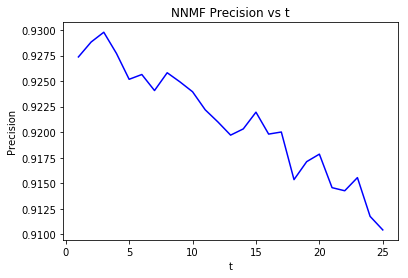

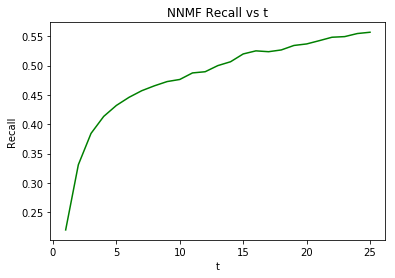

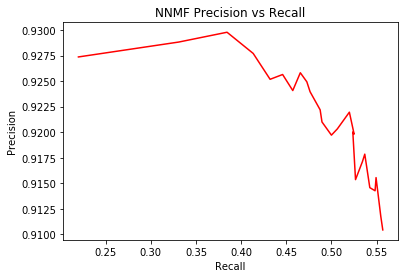

In [53]:
plot_ranking(t_list, nmf_precisions, nmf_recalls, "NNMF")

In [54]:
#Question 38: MF

In [31]:
k_for_q24 = 28

In [32]:
precisions = []
recalls = []

for n in t_list:
    kf = KFold(n_splits=splits)
    precision = 0.0
    recall = 0.0
    users = 0.0
    print ("n=",n)
    for trainset, testset in kf.split(data):
        algo = prediction_algorithms.matrix_factorization.SVD(n_factors = k_for_q24, random_state = 37)
        algo.fit(trainset)
        predictions = algo.test(testset)
        
        user_ratings = defaultdict(list)
        user_predicted = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            user_ratings[uid].append((iid, true_r))
            user_predicted[uid].append((iid, est))
            
            
        user_ratings_filtered = defaultdict(list)
        user_predicted_filtered = defaultdict(list)
        for uid, ratings_list in user_predicted.items():
            ratings_list.sort(key=lambda x: x[1], reverse=True)
            movie_ids_sorted = list(map(lambda x:x[0], ratings_list))
            user_predicted_filtered[uid] = movie_ids_sorted[:n]
            
        user_list = []
        for uid, ratings_list in user_ratings.items():
            u = filter(lambda x:x[1]>=3,ratings_list)
            liked_movies = list(map(lambda x:x[0],u))
            if (len(liked_movies) >= n):
                user_ratings_filtered[uid] = liked_movies
                user_list.append(uid)
                
        precision_fold = 0.0
        recall_fold = 0.0
        for uid in user_list:
            g_len = float(len(user_ratings_filtered[uid]))
            s_len = float(len(user_predicted_filtered[uid]))
            c_len = float(len(set(user_ratings_filtered[uid])&set(user_predicted_filtered[uid])))
            
            precision_fold += c_len/s_len
            recall_fold += c_len/g_len
            
        precision_fold /= float(len(user_list))
        recall_fold /= float(len(user_list))
        
        precision += precision_fold
        recall += recall_fold
            
    precisions.append(precision/float(splits))
    recalls.append(recall/float(splits))
    
mf_precisions = precisions
mf_recalls = recalls

n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25


In [40]:
with open('mf_precisions', 'wb') as f:
    pickle.dump(mf_precisions, f)
with open('mf_recalls', 'wb') as f:
    pickle.dump(mf_recalls, f)

In [41]:
with open('mf_precisions', 'rb') as f:
    mf_precisions = pickle.load(f)
with open('nmf_recalls', 'rb') as f:
    mf_recalls = pickle.load(f)

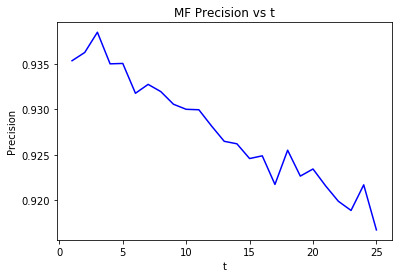

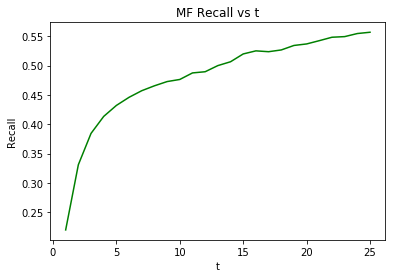

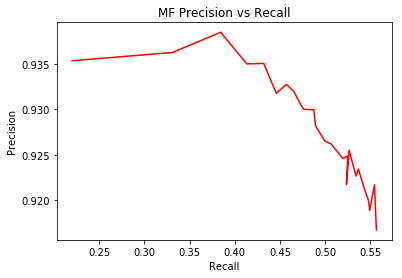

In [55]:
plot_ranking(t_list, mf_precisions, mf_recalls, "MF")

# Question 39

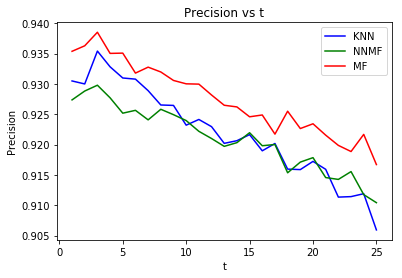

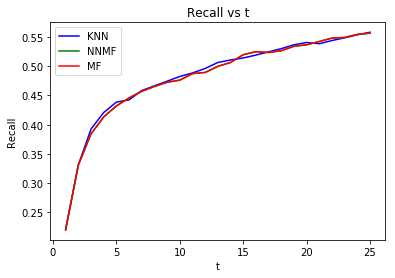

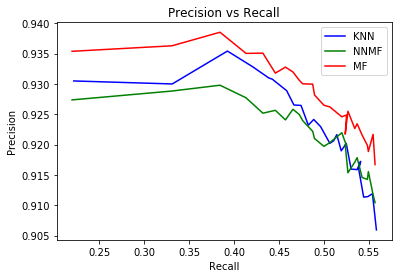

In [60]:
plot_ranking_all(t_list, [knn_precisions, nmf_precisions, mf_precisions], [knn_recalls, nmf_recalls, mf_recalls])